In [1]:
import numpy as np
import sympy as sp
from scipy.optimize import minimize
from scipy.special import roots_legendre
import scipy.linalg as la
import matplotlib.pyplot as plt
from FEM import *
from tools import *
from shape_functions import *
# plt.style.use('default')
import copy
fontsize = 15

# xb=4/5 and a=0.5

In [2]:
num_elems = 4
domain = (0, 1)
p = 3
mesh = np.linspace(domain[0], domain[1], num_elems+1)
a = .5*1
xb = 0.8
if a == 50:
    U_init = 1.585854059271320
elif a == 0.5:
    U_init = 0.03559183822564316
exact_func = exact_fn(a = a, xb=xb)
rhs_func = rhs_fn(a=a, xb=xb)
BCs = (exact_func(domain[0]), exact_func(domain[-1]))


Shape class: linear, Number of elements: 4, Polynomial order:3,  Domain: (0, 1), Boundary conditions: (0.0, 0.0)


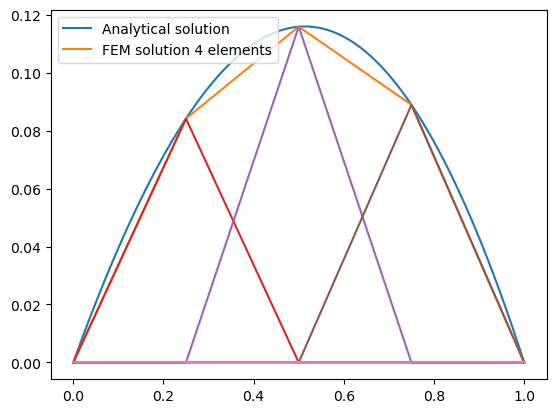

0.03340656074466737

In [3]:
U_l_test, phi_phip_l_test, uh_l_test, cont_K_l_test = FEM_1D(shape_class = linear,p=p, num_elems = num_elems, domain = domain,rhs_func = rhs_func,exact_func=exact_func, BCs = BCs, verbose = True)
cal_energy(U_l_test, phi_phip_l_test)

Shape class: quadratic, Number of elements: 10, Polynomial order:3,  Domain: (0, 1), Boundary conditions: (0.0, 0.0)


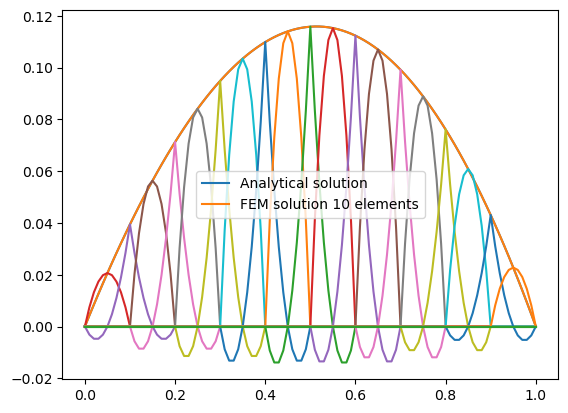

0.03559182991739081

In [4]:
num_elems = 10
U_q_test, phi_phip_q_test, uh_q_test, cont_K_q_test = FEM_1D(shape_class = quadratic,p=p, num_elems = num_elems, domain = domain,rhs_func = rhs_func,exact_func=exact_func, BCs = BCs, verbose = True)
cal_energy(U_q_test, phi_phip_q_test)

Shape class: Hierarchical, Number of elements: 10, Polynomial order:3,  Domain: (0, 1), Boundary conditions: (0.0, 0.0)


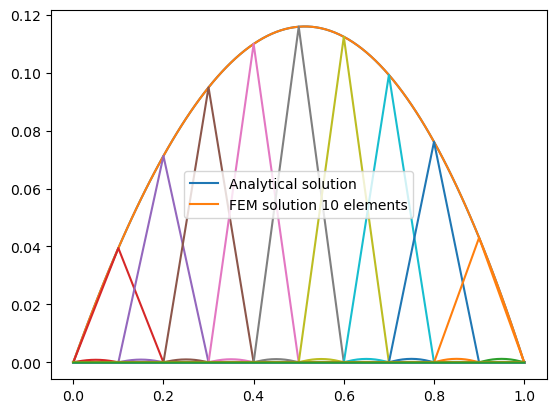

0.035591838276523596

In [5]:
U_l_test, phi_phip_l_test, uh_p_test, cont_K_p_test = FEM_1D(shape_class = Hierarchical,p=p, num_elems = num_elems, domain = domain,rhs_func = rhs_func,exact_func=exact_func, BCs = BCs, verbose = True)
cal_energy(U_l_test, phi_phip_l_test)

# H-FEM

In [6]:
num_elems_list = [2, 4, 8, 16, 32]
domain = (0, 1)
mesh = np.linspace(domain[0], domain[1], num_elems+1)
a = .5*1
xb = 0.8
if a == 50:
    U_init = 1.585854059271320
elif a == 0.5:
    U_init = 0.03559183822564316
exact_func = exact_fn(a = a, xb=xb)
rhs_func = rhs_fn(a=a, xb=xb)
BCs = (exact_func(domain[0]), exact_func(domain[-1]))

energy_list_l = []
error_list_l = []
DOFs_l = []
solution_l = []
cont_K_list_l = []

energy_list_q = []
error_list_q = []
DOFs_q = []
solution_q = []
cont_K_list_q = []

for num_elems in num_elems_list:
    U_l, phi_phip_l, uh_l,cont_K_l = FEM_1D(shape_class = linear,num_elems = num_elems, domain = domain,rhs_func = rhs_func,exact_func=exact_func, BCs = BCs, verbose = False)
    energy_fem_l = cal_energy(U_l, phi_phip_l)
    energy_list_l.append(energy_fem_l)
    error_l = np.sqrt(abs(energy_fem_l-U_init)/U_init)
    DOFs_l.append(len(U_l))
    error_list_l.append(error_l)
    solution_l.append(uh_l)
    cont_K_list_l.append(cont_K_l)
    
    U_q, phi_phip_q, uh_q, cont_K_q = FEM_1D(shape_class = quadratic,num_elems = num_elems, domain = domain,rhs_func = rhs_func,exact_func=exact_func, BCs = BCs, verbose = False)
    energy_fem_q = cal_energy(U_q, phi_phip_q)
    energy_list_q.append(energy_fem_q)
    error_q = np.sqrt(abs(energy_fem_q-U_init)/U_init)
    DOFs_q.append(len(U_q))
    error_list_q.append(error_q)
    solution_q.append(uh_q)
    cont_K_list_q.append(cont_K_q)
print(energy_list_l)
print(energy_list_q)
print(U_init)

[0.026823085213187704, 0.03340656074466737, 0.03504593373143547, 0.035455387861326564, 0.035557727420926305]
[0.03558686846445962, 0.035591515017038444, 0.03559181787350276, 0.03559183704375187, 0.03559183835453883]
0.03559183822564316


# P_FEM

In [7]:
DOFs_p = []
error_list_p = []
solution_p = []
energy_list_p = []
cont_K_list_p = []
p_list = [1, 2, 3, 4, 5]

for p in p_list:
    U_p, phi_phip_p, uh_p, cont_K_p = FEM_1D(shape_class = Hierarchical,p = p, num_elems = 2, domain = domain,rhs_func = rhs_func,exact_func=exact_func, BCs = BCs, verbose = False)
    energy_fem_p = cal_energy(U_p, phi_phip_p)
    error_p = np.sqrt(abs(energy_fem_p-U_init)/U_init)
    energy_list_p.append(energy_fem_p)
    DOFs_p.append(len(U_p))
    error_list_p.append(error_p)
    solution_p.append(uh_p)
    cont_K_list_p.append(cont_K_p)
print(energy_list_p)

[0.026823085213187704, 0.0355868684644596, 0.03559179506689539, 0.03559183813686616, 0.0355918382288883]


linear

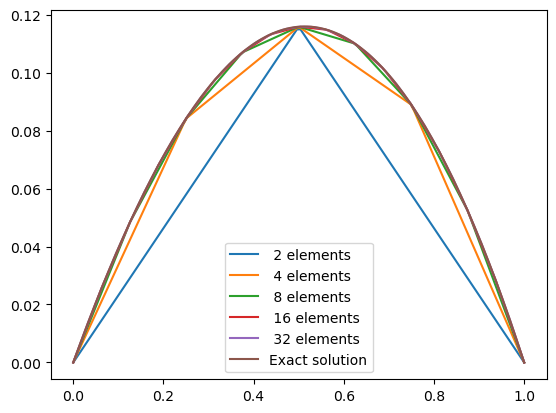

In [8]:
x_data = np.linspace(domain[0], domain[1], 128)
for idx in range(len(solution_l)):
    mesh_l = np.linspace(domain[0], domain[1], num_elems_list[idx]+1)
    mesh_l = np.linspace(domain[0], domain[1], 128)
    plt.plot(mesh_l, solution_l[idx](mesh_l), label=' {} elements'.format(num_elems_list[idx]))
plt.plot(x_data, exact_func(x_data), label='Exact solution')
plt.legend()

quadratic

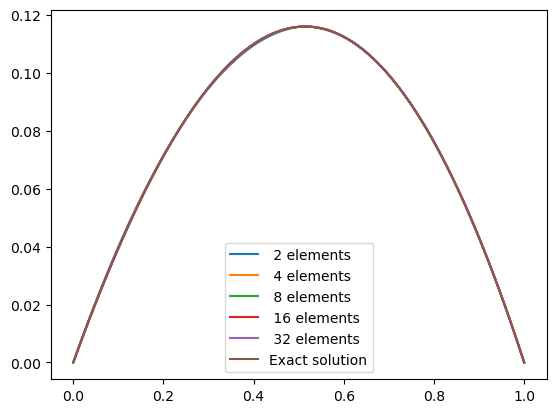

In [9]:
x_data = np.linspace(domain[0], domain[1], 128)
for idx in range(len(solution_q)):
    mesh_q = np.linspace(domain[0], domain[1], num_elems_list[idx]+1)
    mesh_q = np.linspace(domain[0], domain[1], 128)

    plt.plot(mesh_q, solution_q[idx](mesh_q), label=' {} elements'.format(num_elems_list[idx]))
plt.plot(x_data, exact_func(x_data), label='Exact solution')
plt.legend()

p_fem

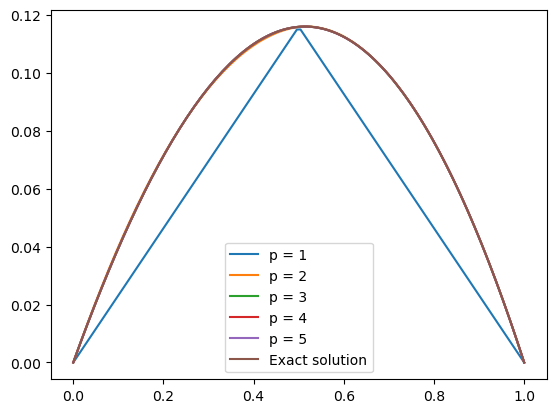

In [10]:
x_data = np.linspace(domain[0], domain[1], 128)
for idx in range(len(solution_p)):
    # mesh_p = np.linspace(domain[0], domain[1], num_elems_list[idx]+1)
    mesh_p = np.linspace(domain[0], domain[1], 128)
    # print(mesh_l)s
    plt.plot(mesh_p, solution_p[idx](mesh_p), label='p = {} '.format(p_list[idx]))
plt.plot(x_data, exact_func(x_data), label='Exact solution')
plt.legend()

In [11]:
print(np.log(error_list_l))
print(np.log(error_list_q))

[-0.70046087 -1.39518677 -2.08871379 -2.78195536 -3.47512872]
[-4.43824992 -5.80466448 -7.18722041 -8.61025548 -9.71818943]


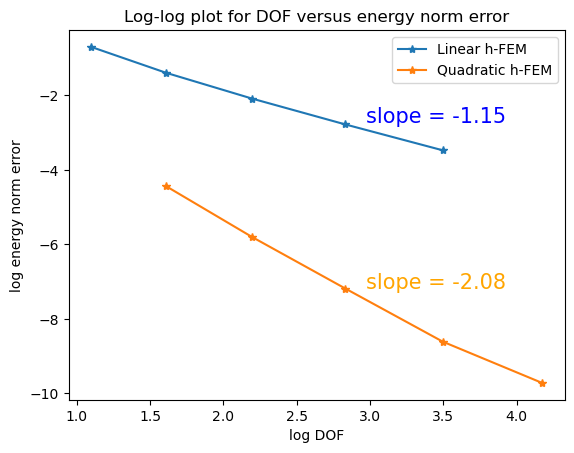

In [12]:
import numpy as np
import matplotlib.pyplot as plt

truncate = 0
log_DOFS_l = np.log(DOFs_l[truncate:])
log_error_list_l = np.log(error_list_l[truncate:])
log_DOFS_q = np.log(DOFs_q[truncate:])
log_error_list_q = np.log(error_list_q[truncate:])

plt.plot(log_DOFS_l, log_error_list_l, '*-', label='Linear h-FEM')
plt.plot(log_DOFS_q, log_error_list_q, '*-', label='Quadratic h-FEM')

# 计算斜率
slope_l, _ = np.polyfit(log_DOFS_l, log_error_list_l, 1)
slope_q, _ = np.polyfit(log_DOFS_q, log_error_list_q, 1)

# 标注斜率
plt.annotate(f'slope = {slope_l:.2f}', xy=(0.6, 0.75), xycoords='axes fraction', color='blue', fontsize = fontsize)
plt.annotate(f'slope = {slope_q:.2f}', xy=(0.6, 0.3), xycoords='axes fraction', color='orange',fontsize = fontsize)

plt.xlabel('log DOF')
plt.ylabel('log energy norm error')
plt.title('Log-log plot for DOF versus energy norm error')
plt.legend()
plt.show()



In [13]:
def posterior_energy(energy_list_array, DOFs_array, slope):
    if len(energy_list_array)<3:
        raise AssertionError("The value of energy should be greater than three!")
    elif len(energy_list_array)!= len(DOFs_array):
        raise AssertionError("The number of energy values should be equal to the number of DOFs!")

    Bh = abs(slope)
    i = 0
    U_list = []
    while i+3 < len(energy_list_array):
        U0, U1, U2 = energy_list_array[i:i+3]
        h0, h1, h2 = 1/np.sqrt(DOFs_array[i:i+3])
        Q = np.log((h0/h1))/np.log((h1/h2))
        lhs = lambda U: np.log(abs((U-U0)/(U-U1)))/np.log(abs((U-U1)/(U-U2)))
        initial_guess = np.mean(energy_list_array[1:])
        result = minimize(lhs, initial_guess)
        U_list.append(result.x)
        i+=1
    return np.mean(U_list)

U_post_l = posterior_energy(energy_list_l, DOFs_l, slope_l)
print('Energy for linear h-FEM', U_post_l)
print('Error for a posterior estimate for linear h-FEM', abs(U_init-U_post_l)/U_init*100)
U_post_q = posterior_energy(energy_list_q, DOFs_q, slope_q)
print('Energy for quadratic FEM', U_post_q)
print('Error for a posterior estimate for quadratic h-FEM', abs(U_init-U_post_q)/U_init*100)



Energy for linear h-FEM 0.03498135110209259
Error for a posterior estimate for linear h-FEM 1.7152447133531936
Energy for quadratic FEM 0.035591781593829495
Error for a posterior estimate for quadratic h-FEM 0.00015911460740840533


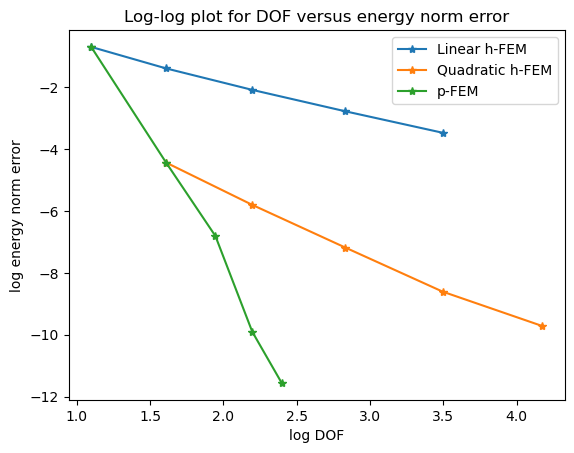

In [14]:

truncate = 0
plt.plot(np.log(DOFs_l[truncate:]), np.log(error_list_l[truncate:]), '*-', label='Linear h-FEM')
plt.plot(np.log(DOFs_q[truncate:]), np.log(error_list_q[truncate:]), '*-', label='Quadratic h-FEM')
plt.plot(np.log(DOFs_p[truncate:]), np.log(error_list_p[truncate:]), '*-', label='p-FEM')
plt.xlabel('log DOF')
plt.ylabel('log energy norm error')
plt.title('Log-log plot for DOF versus energy norm error')
plt.legend()
plt.show()

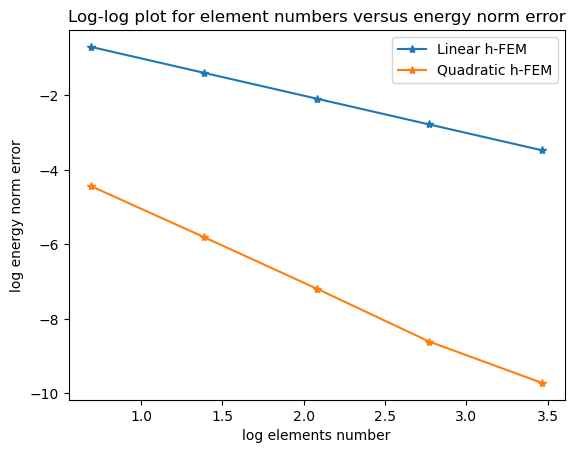

In [15]:
truncate = 0
plt.plot(np.log(num_elems_list[truncate:]), np.log(error_list_l[truncate:]), '*-', label='Linear h-FEM')
plt.plot(np.log(num_elems_list[truncate:]), np.log(error_list_q[truncate:]), '*-', label='Quadratic h-FEM')
plt.xlabel('log elements number')
plt.ylabel('log energy norm error')
plt.title('Log-log plot for element numbers versus energy norm error')
plt.legend()
plt.show()

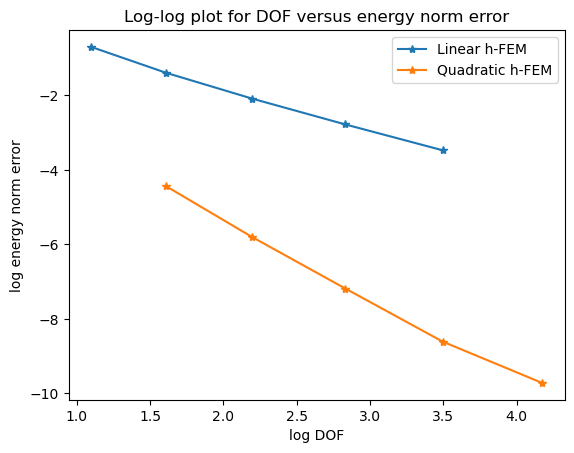

In [16]:

truncate = 0
plt.plot(np.log(DOFs_l[truncate:]), np.log(error_list_l[truncate:]), '*-', label='Linear h-FEM')
plt.plot(np.log(DOFs_q[truncate:]), np.log(error_list_q[truncate:]), '*-', label='Quadratic h-FEM')
plt.xlabel('log DOF')
plt.ylabel('log energy norm error')
plt.title('Log-log plot for DOF versus energy norm error')
plt.legend()
plt.show()


# xb=4/5 and a=50

quadratic

[52.50697096166245, 214.6024898752957, 863.0534278959993, 3456.874567048271]


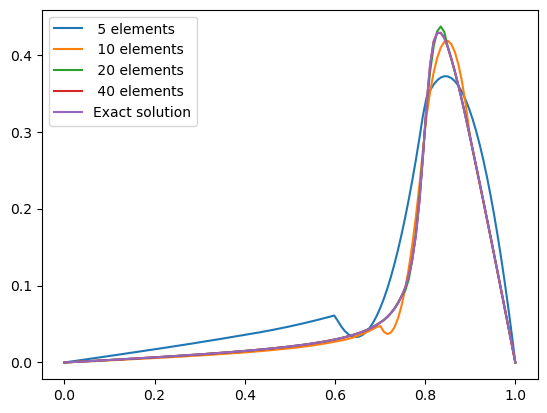

In [17]:
num_elems_list = [5, 10, 20, 40]
domain = (0, 1)
mesh = np.linspace(domain[0], domain[1], num_elems+1)
a = 50
xb = 0.8
if a == 50:
    U_init = 1.585854059271320
elif a == 0.5:
    U_init = 0.03559183822564316
exact_func = exact_fn(a = a, xb=xb)
rhs_func = rhs_fn(a=a, xb=xb)
BCs = (exact_func(domain[0]), exact_func(domain[-1]))

error_list_q = []
DOFs_q = []
solution_q = []
cont_K_list_q = []
for num_elems in num_elems_list:

    U_q, phi_phip_q, uh_q, cont_K_q = FEM_1D(shape_class = quadratic,num_elems = num_elems, domain = domain,rhs_func = rhs_func,exact_func=exact_func, BCs = BCs, verbose = False)
    energy_fem_q = cal_energy(U_q, phi_phip_q)
    error_q = np.sqrt(abs(energy_fem_q-U_init)/U_init)
    DOFs_q.append(len(U_q))
    error_list_q.append(error_q)
    solution_q.append(uh_q)
    cont_K_list_q.append(cont_K_q)
    
x_data = np.linspace(domain[0], domain[1], 128)
for idx in range(len(solution_q)):
    # mesh_q = np.linspace(domain[0], domain[1], num_elems_list[idx]+1)
    mesh_q = np.linspace(domain[0], domain[1], 128)
    plt.plot(mesh_q, solution_q[idx](mesh_q), label=' {} elements'.format(num_elems_list[idx]))
    
plt.plot(x_data, exact_func(x_data), label='Exact solution')
plt.legend()
print(cont_K_list_q)

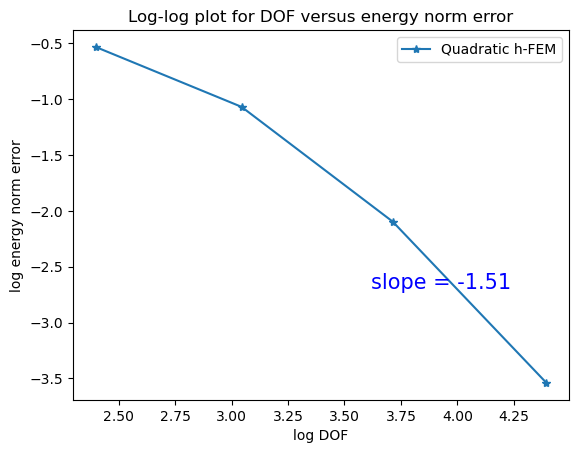

In [18]:

truncate = 0
log_DOFS_q = np.log(DOFs_q[truncate:])
log_error_list_q = np.log(error_list_q[truncate:])

plt.plot(log_DOFS_q, log_error_list_q, '*-', label='Quadratic h-FEM')

slope_q, _ = np.polyfit(log_DOFS_q, log_error_list_q, 1)

plt.annotate(f'slope = {slope_q:.2f}', xy=(0.6, 0.3), xycoords='axes fraction', color='blue',fontsize = fontsize)

plt.xlabel('log DOF')
plt.ylabel('log energy norm error')
plt.title('Log-log plot for DOF versus energy norm error')
plt.legend()
plt.show()



p-FEM

In [19]:
DOFs_p = []
error_list_p = []
solution_p = []
cont_K_list_p = []
p_list = [1, 2, 3,4 ,5]
for p in p_list:
    U_p, phi_phip_p, uh_p, cont_K_p = FEM_1D(shape_class = Hierarchical,p = p, num_elems = 5, domain = domain,rhs_func = rhs_func,exact_func=exact_func, BCs = BCs, verbose = False)
    energy_fem_p = cal_energy(U_p, phi_phip_p)
    error_p = np.sqrt(abs(energy_fem_p-U_init)/U_init)
    DOFs_p.append(len(U_p))
    error_list_p.append(error_p)
    solution_p.append(uh_p)
    cont_K_list_p.append(cont_K_p)
print(cont_K_list_p)
print(DOFs_p)

[9.472135954999576, 9.472135954999576, 9.472135954999576, 9.472135954999576, 9.472135954999576]
[6, 11, 16, 21, 26]


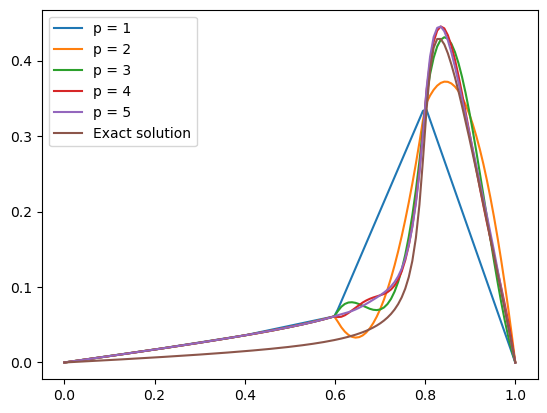

In [20]:
x_data = np.linspace(domain[0], domain[1], 128)
for idx in range(len(solution_p)):
    # mesh_p = np.linspace(domain[0], domain[1], num_elems_list[idx]+1)
    mesh_p = np.linspace(domain[0], domain[1], 128)
    # print(mesh_l)s
    plt.plot(mesh_p, solution_p[idx](mesh_p), label='p = {} '.format(p_list[idx]))
plt.plot(x_data, exact_func(x_data), label='Exact solution')
plt.legend()

In [21]:
print(DOFs_p)
print(DOFs_q)

[6, 11, 16, 21, 26]
[11, 21, 41, 81]


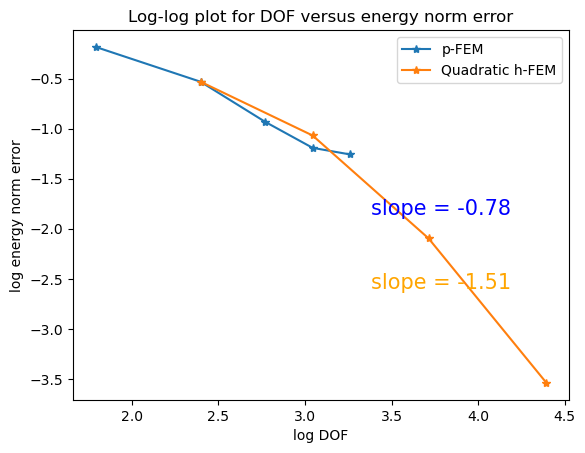

In [22]:

truncate = 0
log_DOFS_p = np.log(DOFs_p[truncate:])
log_error_list_p = np.log(error_list_p[truncate:])

plt.plot(log_DOFS_p, log_error_list_p, '*-', label='p-FEM')

slope_p, _ = np.polyfit(log_DOFS_p, log_error_list_p, 1)

plt.annotate(f'slope = {slope_p:.2f}', xy=(0.6, 0.5), xycoords='axes fraction', color='blue',fontsize = fontsize)
log_DOFS_q = np.log(DOFs_q[truncate:])
log_error_list_q = np.log(error_list_q[truncate:])

plt.plot(log_DOFS_q, log_error_list_q, '*-', label='Quadratic h-FEM')

slope_q, _ = np.polyfit(log_DOFS_q, log_error_list_q, 1)

plt.annotate(f'slope = {slope_q:.2f}', xy=(0.6, 0.3), xycoords='axes fraction', color='orange',fontsize = fontsize)

plt.xlabel('log DOF')
plt.ylabel('log energy norm error')
plt.title('Log-log plot for DOF versus energy norm error')
plt.legend()
plt.show()



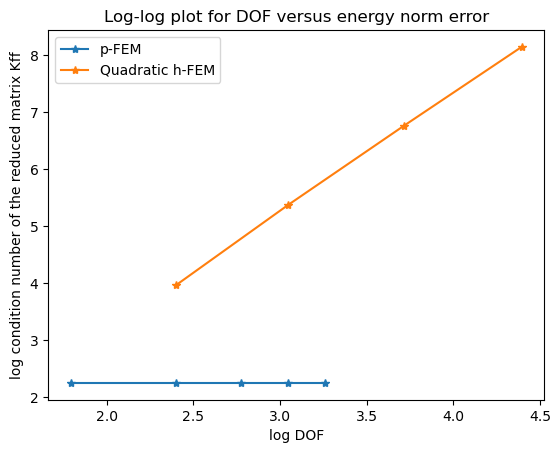

[2.24835443 2.24835443 2.24835443 2.24835443 2.24835443]


In [25]:

truncate = 0
log_DOFS_p = np.log(DOFs_p[truncate:])
log_cont_K_list_p = np.log(abs(np.array(cont_K_list_p[truncate:])))

plt.plot(log_DOFS_p, log_cont_K_list_p, '*-', label='p-FEM')

log_DOFS_q = np.log(DOFs_q[truncate:])
log_cont_K_list_q = np.log(abs(np.array(cont_K_list_q[truncate:])))
plt.plot(log_DOFS_q, log_cont_K_list_q, '*-', label='Quadratic h-FEM')

plt.xlabel('log DOF')
plt.ylabel('log condition number of the reduced matrix Kff')
plt.title('Log-log plot for DOF versus energy norm error')
plt.legend()
plt.show()
print(log_cont_K_list_p,)


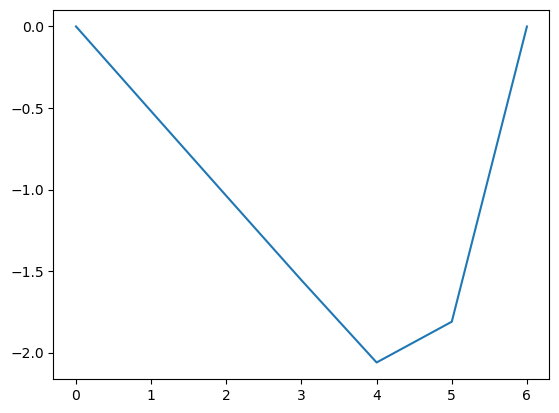

In [28]:
U_q, phi_phip_q, uh_q, cont_K_q = FEM_1D(shape_class = quadratic,num_elems = 3, domain = domain,rhs_func = rhs_func,exact_func=exact_func, BCs = BCs, verbose = False)
plt.plot(U_q)